# Requirements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer

from sklearn.svm import SVC
from xgboost import XGBRegressor

from datetime import datetime

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
16630,43.0,male,83552,doctorate,9,hiking,2931,rural,264.0,253,summer,1,0,0
898,59.0,male,40907,high school,8,skiing,651,suburban,51.0,271,fall,1,0,1
41141,47.0,non-binary,20957,high school,6,skiing,2218,rural,89.0,224,fall,1,0,1
24964,21.0,non-binary,28741,high school,9,hiking,3075,urban,213.0,225,fall,1,0,1
21217,19.0,male,40041,doctorate,0,swimming,1501,suburban,163.0,290,spring,1,1,0


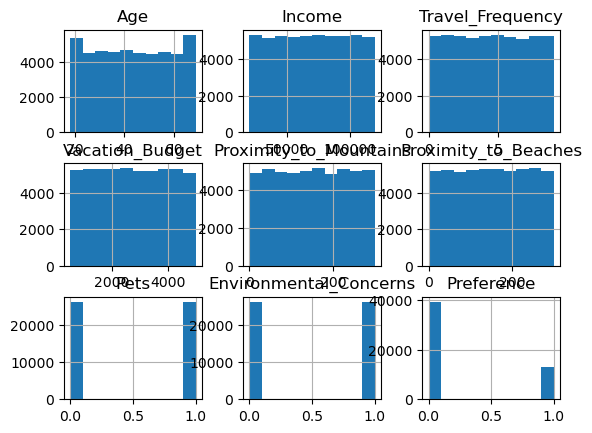

In [ ]:
df = pd.read_csv('vacation_preferences_data.csv')
df.hist()
df.sample(5)

In [73]:
print(len(df))
df.dropna(subset=['Preference'])
print(len(df))

52444
52444


In [9]:
df = df.ffill()

In [11]:
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [89]:
x = df.drop(columns='Preference', axis=1)
y = df['Preference']

In [91]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [93]:
#imputer = KNNImputer(n_neighbors=3)
#train_x['Gender'] = imputer.fit_transform(scaled_data)
#train_x.sample(5)

train_x['Gender'] = train_x['Gender'].fillna(train_x['Gender'].mode()[0])
test_x['Gender'] = test_x['Gender'].fillna(test_x['Gender'].mode()[0])

train_x['Education_Level'] = train_x['Education_Level'].fillna(train_x['Education_Level'].mode()[0])
test_x['Education_Level'] = test_x['Education_Level'].fillna(test_x['Education_Level'].mode()[0])

train_x['Proximity_to_Mountains'] = train_x['Proximity_to_Mountains'].fillna(train_x['Proximity_to_Mountains'].median())
test_x['Proximity_to_Mountains'] = test_x['Proximity_to_Mountains'].fillna(test_x['Proximity_to_Mountains'].median())

train_x.sample(5)
#df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)
#df['Proximity_to_Mountains'].fillna(df['Proximity_to_Mountains'].mode()[0], inplace=True)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns
27109,NaN,female,102072,master,6,swimming,3627,rural,225.0,6,summer,1,0
19431,40.0,non-binary,113347,bachelor,2,skiing,3803,suburban,5.0,171,fall,0,0
45181,28.0,female,110125,bachelor,9,skiing,880,suburban,99.0,167,spring,1,1
36248,28.0,male,60918,bachelor,8,hiking,905,suburban,66.0,235,winter,0,1
22596,51.0,non-binary,110014,doctorate,8,skiing,4435,suburban,184.0,235,spring,1,0


In [103]:
encoder = LabelEncoder()

train_x['Gender'] = encoder.fit_transform(train_x['Gender'])
test_x['Gender'] = encoder.transform(test_x['Gender'])

train_x['Education_Level'] = encoder.fit_transform(train_x['Education_Level'])
test_x['Education_Level'] = encoder.transform(test_x['Education_Level'])

train_x['Preferred_Activities'] = encoder.fit_transform(train_x['Preferred_Activities'])
test_x['Preferred_Activities'] = encoder.transform(test_x['Preferred_Activities'])

train_x['Location'] = encoder.fit_transform(train_x['Location'])
test_x['Location'] = encoder.transform(test_x['Location'])

train_x['Favorite_Season'] = encoder.fit_transform(train_x['Favorite_Season'])
test_x['Favorite_Season'] = encoder.transform(test_x['Favorite_Season'])

In [105]:
model = XGBRegressor(learning_rate=0.1)
train_x.sample(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns
7061,65.0,1,65788,2,3,0,3090,1,187.0,221,1,0,1
20499,62.0,1,30078,1,2,2,1718,1,208.0,70,1,0,0
31081,59.0,1,45535,0,9,0,2900,1,34.0,208,0,1,0
17814,23.0,0,32983,2,9,2,577,0,36.0,42,0,0,0
9008,23.0,0,35745,2,7,3,3610,0,103.0,104,2,0,0
37489,NaN,0,33698,1,5,2,2694,1,220.0,56,0,1,0
1745,68.0,2,97199,0,7,1,3404,1,278.0,162,2,1,1
37133,65.0,2,59427,2,4,3,1328,1,204.0,58,1,1,1
22439,18.0,1,23148,1,5,0,4873,0,209.0,233,3,0,1
46553,56.0,0,82648,3,6,2,3062,1,73.0,14,2,1,0


In [107]:
model.fit(train_x, train_y)

y_pred = model.predict(test_x)

print(r2_score(test_y, y_pred))

0.9422315359115601


In [ ]:
data['Date_of_Birth'] = pd.to_datetime(data['Date_of_Birth'])

today = pd.to_datetime(datetime.today().date())

data['Age'] = (today - data['Date_of_Birth']).dt.days // 365